## HANDLING MISSING VALUES-FEATURE ENGINEERING
### Continous features

#### Lifecycle of a Data Science Projects

#### Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
#### Feature Engineering---Handling Missing Values
#### Why are their Missing values?? Survey--Depression Survey

#### They hesitate to put down the information
#### Survey informations are not that valid
#### Men--salary
#### Women---age
#### People may have died----NAN
#### Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?
#### 1.Missing Completely at Random, MCAR:
#### A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
# Using the Titanic Dataset

In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
# Finding the sum of missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# There are three features with missing vaalues ie. Age,Cabin and Embaarked
# finding percentage of missing value in Cabin

df['Cabin'].isnull().mean()

0.7710437710437711

In [8]:
# Replacing the missing value with a 1 and 0 when not missing while creating a new column

df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
# Finding the relationship between data with carbin null and survival rate in percentage

df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### Techniques of handling Missing Values
##### 1.Mean, Mode, Median replacement
##### 2.Random Sample Imputation
##### 3.Capturing a Null value with a new feature
##### 4.End of distribution imputation
##### 5.Abitrary imputation
##### 6.Frequent Category imputation

#### 1. Mean, Median, Mode Imputation
##### Should be used when the assumption is that the data is completely missing at randomly
##### When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [13]:
df = pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
# Compute percentage of missing values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [95]:
def fill_null_median(df, variable, median):
    df[variable+'_median']=df[variable].fillna(median)
median = df['Age'].median()
median

28.0

In [78]:
fill_null_median(df,'Age', median)

In [80]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_mode
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,NaN
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [82]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

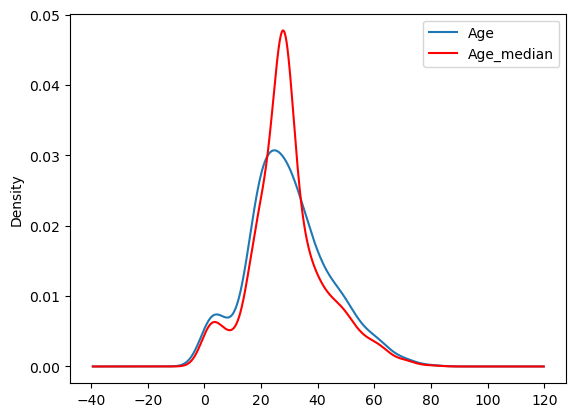

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [101]:
def fill_null_mode(df, variable, mode):
    df[variable+'_mode']=df[variable].fillna(mode)
mode = df['Age'].mode()[0]
mode

24.0

In [103]:
fill_null_mode(df, 'Age', mode)

In [109]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_mode
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,24.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [111]:
print(df['Age'].std())
print(df['Age_mode'].std())

14.526497332334044
13.199571767746487


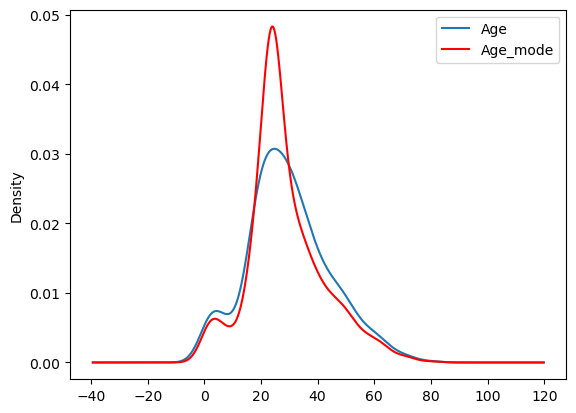

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mode.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [115]:
def fill_null_mean(df, variable, mean):
    df[variable+'_mean'] = df[variable].fillna(mean)
mean = df['Age'].mean()
mean

29.69911764705882

In [117]:
fill_null_mean(df, 'Age', mean)

In [121]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_mode,Age_mean
0,0,22.0,7.2500,22.0,22.0,22.000000
1,1,38.0,71.2833,38.0,38.0,38.000000
2,1,26.0,7.9250,26.0,26.0,26.000000
3,1,35.0,53.1000,35.0,35.0,35.000000
4,0,35.0,8.0500,35.0,35.0,35.000000
5,0,NaN,8.4583,28.0,24.0,29.699118
6,0,54.0,51.8625,54.0,54.0,54.000000
7,0,2.0,21.0750,2.0,2.0,2.000000
8,1,27.0,11.1333,27.0,27.0,27.000000
9,1,14.0,30.0708,14.0,14.0,14.000000


In [125]:
print(df['Age'].std())
print(df['Age_mean'].std())

14.526497332334044
13.002015226002884


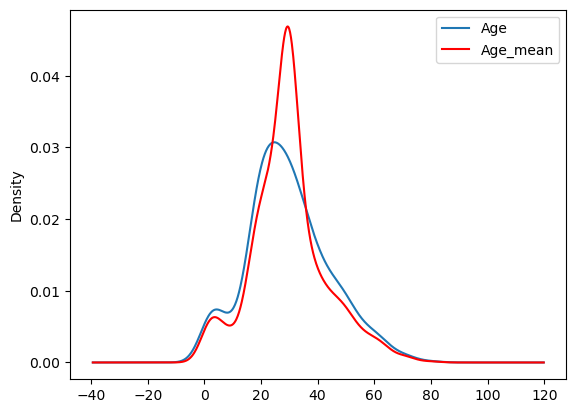

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
#### Easy to implement(Robust to outliers)
####  way to obtain the complete dataset
#### Disadvantages
#### Change or Distortion in the original variance
#### Impacts Correlation

### 2 Random Sample Imputation

In [138]:
df = pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv', usecols=['Age','Fare','Survived'])

In [140]:
# sum of null values in each column

df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [142]:
#percentage of null values in each column

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [249]:
# create a function that replaces the null values with a random sample

def fill_null_random(df, variable, median):
    df[variable+'_median'] = df['Age'].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample
# df['Age'].sample().values

In [255]:
fill_null_random(df, 'Age', median)

In [267]:
df.head(20)

,Survived,Age,Fare,Age_sample,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.00,22.0
1,1,38.0,71.2833,38.0,38.00,38.0
2,1,26.0,7.9250,26.0,26.00,26.0
3,1,35.0,53.1000,35.0,35.00,35.0
4,0,35.0,8.0500,35.0,35.00,35.0
5,0,NaN,8.4583,NaN,28.00,28.0
6,0,54.0,51.8625,54.0,54.00,54.0
7,0,2.0,21.0750,2.0,2.00,2.0
8,1,27.0,11.1333,27.0,27.00,27.0
9,1,14.0,30.0708,14.0,14.00,14.0


In [259]:
print(df['Age'].std())
print(df['Age_random'].std())

14.526497332334044
14.5636540895687


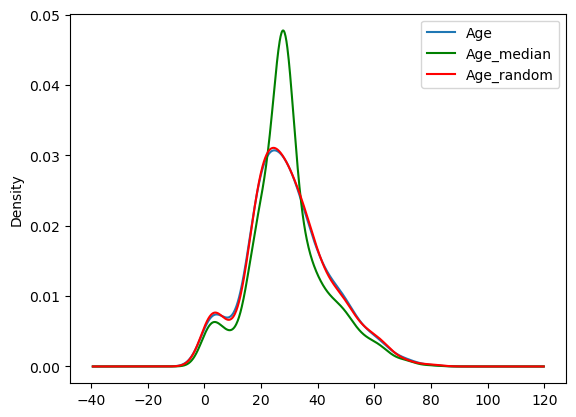

In [269]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 3. Capturing Null values with new features

Works well when data is are not missing completely at random

In [274]:
df = pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [278]:
# whenever there is a null value replace it with 1 else 0

df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### 4. End of Distribution imputation
Replacing the null values with the 3rd quaartile of the data distribution

In [281]:
df = pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

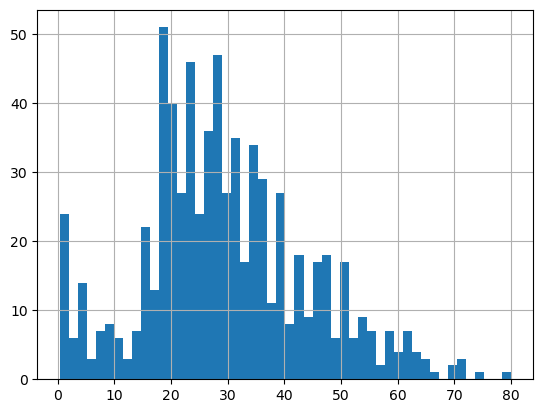

In [291]:
df.Age.hist(bins=50)

In [302]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [316]:
extreme=df.Age.mean()+3*df.Age.std()

<Axes: xlabel='Age'>

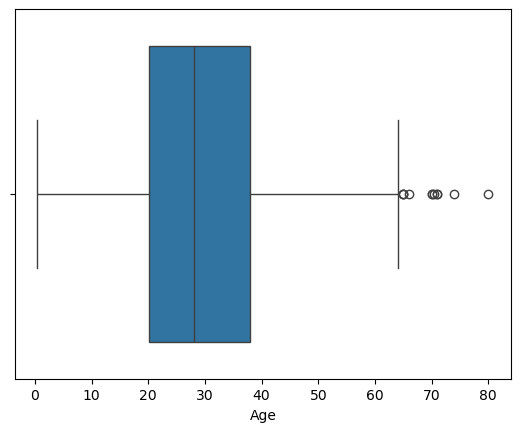

In [318]:
# First identify outliers

import seaborn as sns

sns.boxplot(x=df['Age'])

In [320]:
# A function that replaces our null values with the extreme values

def full_null_extreme(df,variable,extreme):
    df[variable+'_extreme']=df[variable].fillna(extreme)

In [322]:
full_null_extreme(df,'Age',extreme)

In [328]:
df.head(20)

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: xlabel='Age_extreme'>

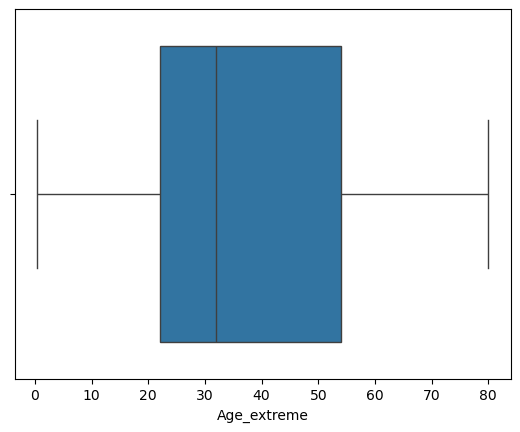

In [330]:
sns.boxplot(x=df['Age_extreme'])

### 5.Abitrary Value Imputation

In [335]:
df = pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [337]:
def fill_null_arbitrary(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

In [339]:
fill_null_arbitrary(df,'Age')

In [343]:
df.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


## HANDLING MISSING VALUES-FEATURE ENGINEERING
### Categorical variable

##### Frequent category imputation

In [354]:
# loading  a new dataset

df=pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/House_Price/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [356]:
#df.columns

In [362]:
df.shape

(1460, 4)

In [366]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [373]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<Axes: xlabel='BsmtQual'>

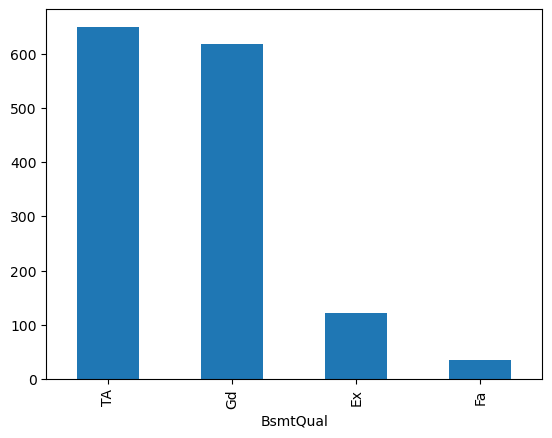

In [441]:
df['BsmtQual'].value_counts().plot.bar()

In [455]:
df['BsmtQual'].value_counts().idxmax()

'TA'

In [457]:
df['BsmtQual'].value_counts().index[0]

'TA'

<Axes: xlabel='GarageType'>

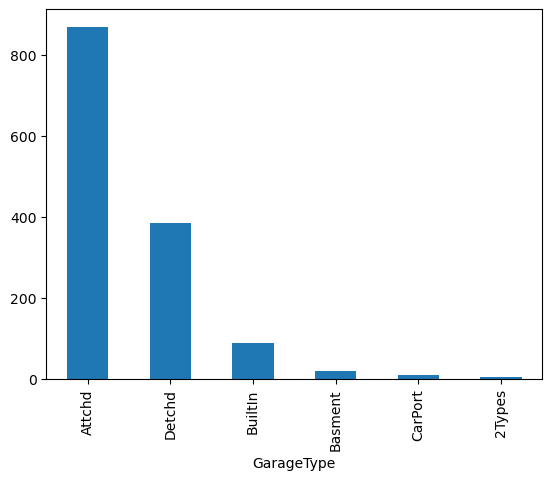

In [451]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='FireplaceQu'>

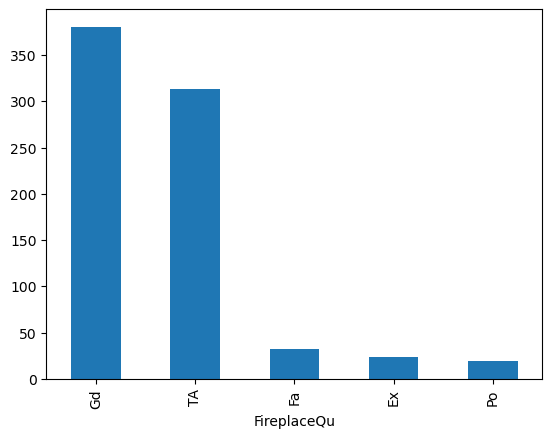

In [453]:
df['FireplaceQu'].value_counts().plot.bar()

In [469]:
# Since BsmtQual and GarageType are having a few missing values, we can fill null with the most frequent value
# a function for the above replacement

def fill_null(df,variable):
    most_frequent_category = df[variable].value_counts().idxmax()
    df[variable].fillna(most_frequent_category, inplace=True)
    

In [471]:
for feature in ['FireplaceQu','GarageType','BsmtQual']:
    fill_null(df,feature)

C:\Users\user\AppData\Local\Temp\ipykernel_4592\1778737152.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4592\1778737152.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [473]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [475]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Adding a variable to capture NAN

In [478]:
df=pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/House_Price/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [480]:
df['BsmtQual_Val']=np.where(df['BsmtQual'].isnull(),1,0)

In [486]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Val
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [512]:
frequent = df['BsmtQual'].mode()[0]

In [516]:
df['BsmtQual'].fillna(frequent, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4592\2680611753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(frequent, inplace=True)


In [518]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Val
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


#### Suppose you have more frequent categories, we replace NAN with a new category or Missing-anything-its the most used technique

In [521]:
df=pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/House_Price/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [523]:
def replace_null(df,variable):
    df[variable+'_NewValue']=np.where(df[variable].isnull(),'Missing',df[variable])

In [525]:
for feature in ['FireplaceQu','GarageType','BsmtQual']:
    replace_null(df,feature)

In [527]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_NewValue,GarageType_NewValue,BsmtQual_NewValue
0,Gd,NaN,Attchd,208500,Missing,Attchd,Gd
1,Gd,TA,Attchd,181500,TA,Attchd,Gd
2,Gd,TA,Attchd,223500,TA,Attchd,Gd
3,TA,Gd,Detchd,140000,Gd,Detchd,TA
4,Gd,TA,Attchd,250000,TA,Attchd,Gd


In [531]:
df=df.drop(['FireplaceQu','GarageType','BsmtQual'], axis=1)

In [533]:
df.head()

,SalePrice,FireplaceQu_NewValue,GarageType_NewValue,BsmtQual_NewValue
0,208500,Missing,Attchd,Gd
1,181500,TA,Attchd,Gd
2,223500,TA,Attchd,Gd
3,140000,Gd,Detchd,TA
4,250000,TA,Attchd,Gd


In [536]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Picking only the categorical features

train_set = train_set['1','3','5','6','7','8','9','13']